<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# Régression polynomiale avec SciKit-Learn

Nous avons vu comment créer une droite de meilleur ajustement très simple, mais nous allons maintenant élargir considérablement notre boîte à outils pour commencer à réfléchir aux considérations de sur-entraînement (overfitting), de sous-entraînement (underfitting), d'évaluation de modèle, ainsi que de features multiples !

## Importations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Échantillons de données

Ces exemples de données proviennent du livre l'ISLR. Il affiche les ventes (en milliers d'unités) pour un produit particulier en fonction des budgets publicitaires (en milliers de dollars) pour la télévision, la radio et les journaux.

In [ ]:
df = pd.read_csv("Advertising.csv")

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# tout SAUF la colonne sales
X = df.drop('sales',axis=1)

In [ ]:
y = df['sales']

# SciKit Learn

## Régression Polynomiale

**À partir de Preprocessing, importez PolynomialFeatures, qui nous aidera à transformer notre ensemble de données d'origine en ajoutant des features polynomiales**.

Nous irons de l'équation sous la forme (montrée ici comme si nous n'avions qu'une seule feature x) :

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

et créer d'autres features à partir de la feature d'origine x pour un certain *d* degré de polynôme.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Nous pouvons alors appeler le modèle de régression linéaire sur celui-ci, puisqu'en réalité, nous traitons simplement ces nouvelles features polynomiales x^2, x^3, ... x^d comme de nouvelles features. Évidemment, nous devons faire attention à choisir la valeur correcte de *d*, le degré du modèle. Nos résultats de metrics sur l'ensemble de test nous aideront à le faire !

**L'autre chose à noter ici est que nous avons plusieurs features X, et non pas seulement une seule comme dans la formule ci-dessus, donc en réalité, les PolynomialFeatures prendront également en compte les termes *d'interaction* ; par exemple, si un échantillon d'entrée est bidimensionnel et de la forme [a, b], les features polynomiales de degré 2 sont [1, a, b, a^2, ab, b^2].**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
# Le convertisseur s'adapte aux données, dans ce cas, il lit chaque colonne X.
# Puis il "transforme" et sort les nouvelles données polynomiales.
poly_features = polynomial_converter.fit_transform(X)

In [ ]:
poly_features.shape

(200, 9)

In [ ]:
X.shape

(200, 3)

In [ ]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [ ]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [ ]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [ ]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

Les termes d'interaction : $$x_1  \cdot x_2 \text{  et  } x_1  \cdot x_3 \text{  et  }   x_2  \cdot x_3 $$

In [ ]:
230.1*37.8

8697.779999999999

In [ ]:
230.1*69.2

15922.92

In [ ]:
37.8*69.2

2615.7599999999998

## Fractionnement Train | Test

Assurez-vous d'avoir regardé les vidéos de présentation de Machine Learning sur l'apprentissage supervisé pour comprendre pourquoi nous procédons à cette étape.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# random_state:
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Modèle d'ajustement/entraînement sur des données polynomiales

### Créer une instance du modèle avec des paramètres

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(fit_intercept=True)

### Fit/Train le modèle sur les données d'entraînement

**Assurez-vous de n'ajuster (fit) que sur les données d'entraînement/apprentissage, afin d'évaluer équitablement les performances de votre modèle sur les données futures**.

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

## Évaluation sur le Set de Test

### Calcul des performances sur l'ensemble de test

Nous voulons évaluer notre modèle de manière équitable. Nous obtenons donc des metrics de performance sur l'ensemble de test (données que le modèle n'a jamais vues auparavant).

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

0.4896798044803836

In [ ]:
MSE

0.4417505510403753

In [ ]:
RMSE

0.6646431757269274

In [ ]:
df['sales'].mean()

14.022500000000003

### Comparaison avec la régression linéaire simple

**Résultats sur l'ensemble de test (Remarque : utilisez la même répartition aléatoire pour effectuer une comparaison équitable !**)

* Régression linéaire simple :
    * MAE : 1.213
    * RMSE : 1.516

* Régression polynomial 2-degrés :
    * MAE : 0.4896
    * RMSE : 0.664

## Choix d'un modèle

### Ajustement des paramètres

Sommes-nous satisfaits de ces performances ? Peut-être qu'un ordre plus élevé améliorerait encore plus les performances ! Mais quel ordre serait trop élevé ? C'est maintenant à nous de revenir en arrière et d'ajuster notre modèle et nos paramètres, explorons les polynômes d'ordre supérieur dans une boucle et traçons leur erreur. Cela nous conduira à une discussion sur l'overfitting.

Utilisons une boucle for pour faire ce qui suit :

1. Créer des données X polynomiales d'ordre différent
2. Diviser ces données polynomiales pour l'entraînement et le test.
3. Ajustement/entraînement sur les données d'entraînement
4. Rapportez les métriques sur *les deux* résultats d'entraînement et de test.
5. Tracer ces résultats et explorer l'overfitting

In [ ]:
# ERREUR D'ENTRAÎNEMENT PAR DEGRÉ
train_rmse_errors = []
# ERREUR DE TEST PAR DEGRÉ
test_rmse_errors = []

for d in range(1,10):

    # CRÉER DATA SET POLY POUR DEGRÉ "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # DIVISER CE NOUVEAU DATA SET POLY
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    # ENTRAÎNER SUR CE NOUVEAU SET POLY
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # PRÉDIRE À LA FOIS SUR TRAIN ET SUR TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calcul des erreurs

    # Erreurs sur Training Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    # Erreurs sur test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Ajoutez (append) les erreurs à des listes pour les tracer ultérieurement

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

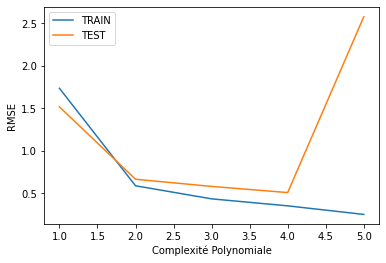

In [ ]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Complexité Polynomiale")
plt.ylabel("RMSE")
plt.legend();

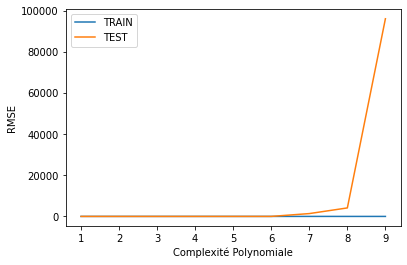

In [ ]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Complexité Polynomiale")
plt.ylabel("RMSE")
plt.legend();

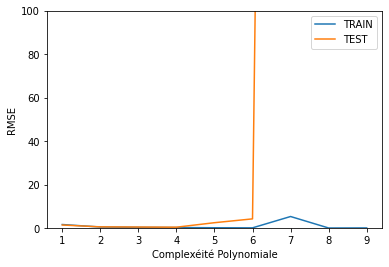

In [ ]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Complexéité Polynomiale")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend();

## Finalisation du choix du modèle

Il y a maintenant 2 choses que nous devons sauvegarder, l'objetde création des features polynmiales ET le modèle lui-même. Voyons comment nous pouvons procéder à partir de là :

1. Choisir les paramètres finaux en fonction des metrics de test
2. Ré-entraîner sur toutes les données
3. Enregistrer l'objet polynomial_converter
4. Sauvegarder le modèle

In [ ]:
# D'après notre graphique, cela aurait pu être aussi degré=4, mais
# il vaut mieux être du côté "sûr" de la complexité.
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

### Sauvegarde du Model et du Converter

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, 'sales_poly_model.joblib')

['sales_poly_model.joblib']

In [ ]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

## Déploiement et Prédictions

### Prédiction sur de nouvelles données

Rappelez-vous que nous devrons **convertir** toutes les données entrantes en données polynomiales, puisque c'est sur ces données que notre modèle est entraîné. Nous chargeons simplement l'objet Converter que nous avons sauvegardé et n'appelons **.transform()** que sur les nouvelles données, puisque nous ne ré-adaptons pas le modèle à un nouvel ensemble de données.

**Notre prochaine campagne publicitaire aura une dépense totale (en dollars) de 149 000 à la télévision, 22 000 à la radio et 12 000 dans les journaux. Combien d'unités pouvons-nous espérer vendre grâce à cette campagne ?**

In [ ]:
loaded_converter = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [ ]:
campaign = [[149,22,12]]

In [ ]:
campaign_poly = loaded_converter.transform(campaign)

In [ ]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [ ]:
final_model.predict(campaign_poly)

array([14.64501014])